**Customer Churn Classification** by Azimatul Matsniya
* Dataset from https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [1]:
# Import Databases
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Dataset

In [2]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
print('ukuran dataset = ',df.shape)
df.head()

ukuran dataset =  (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = df.copy()
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Handling Dataset: Checking Missing Value.
There is no missing value in this dataset.

In [4]:
# Mapping target, 0 for 'Not Churn' and 1 for 'Churn'
target_map = {0:'Non Churn', 1:'Churn'}
def target_mapping(target):
  return target_map[int(target)]

data['target'] = data['churn'].apply(lambda x : target_mapping(x))
data['target'].head()

0        Churn
1    Non Churn
2        Churn
3    Non Churn
4    Non Churn
Name: target, dtype: object

In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Function for Analysis

In [6]:
# Function for count number of customer based on certain category
def uni_count(data,col1,col2='target'):
  temp = data.groupby([col1,col2], as_index=False)['customer_id'].count()
  temp.sort_values(by='customer_id', inplace=True, ascending=False)

  plt.figure(figsize=(10,5))
  sns.barplot(x=col1, y='customer_id', data=temp, hue='target', color = 'seagreen', palette = 'ch:start=1,rot=-.9_r')
  plt.title('Total customer categorized by %s' %col1, fontweight='bold')
  plt.ylabel('Customer')
  plt.show()
  return temp

In [7]:
# Function for percantege of customer who has left based on certain category
def percentage(data, col1, col2='churn'):
  temp = data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum()).reset_index()
  temp['percentage'] = data.groupby(col1)[col2].agg(percentage = 'mean').reset_index()['percentage']
  temp['percentage'] = temp['percentage']*100
  temp['total'] = data.groupby(col1)[col2].agg(total = 'count').reset_index()['total']
  temp.sort_values(by='percentage', inplace=True, ascending=False)
  print('Detail of customer who has left bank categorized by %s' %col1)
  return temp

In [8]:
# Function for groupby mean
def average(data,col1,col2):
  temp = data.groupby(col1)[col2].mean().reset_index()
  temp.sort_values(by=col2, inplace=True, ascending=False)

  plt.figure(figsize=(5,3))
  sns.barplot(x=col1, y=col2, data=temp, color = 'seagreen', palette = 'ch:start=1,rot=-.9_r')
  plt.title(f'Average of {col2} categorized by {col1}', fontweight='bold')
  plt.ylabel(f'Average of {col2}')
  plt.show()

  return temp

In [9]:
# function for multivariate (mean)
def multi_mean(data,col1,col2,col3='target'):
  temp = data.groupby([col1,col3])[col2].mean().reset_index()
  temp.sort_values(by=col3, inplace=True, ascending=False)

  fig = sns.catplot(x=col1,
            y=col2,
            hue='target',
            data= temp,
            color = 'seagreen',
            palette = 'ch:start=1,rot=-.9_r',
            kind='bar',
            height=3, aspect=.8)
  fig.set_xticklabels(rotation=45, horizontalalignment='right')
  plt.show()

  return temp

In [10]:
# function for multivariate (count)
def multi_count(data,col1,col2,col3):
  temp = data.groupby([col1,col2,col3])['customer_id'].count().reset_index()
  temp.sort_values(by='customer_id', inplace=True, ascending=False)

  fig = sns.catplot(x=col1,
            y='customer_id',
            col = col2,
            hue='target',
            data= temp,
            color = 'seagreen',
            palette = 'ch:start=1,rot=-.9_r',
            kind='bar',
            height=5, aspect=.8)
  #plt.title(f'Number of {col2} categorized by {col1}', fontweight='bold')
  #plt.ylabel(f'Number of {col2}')
  fig.set_xticklabels(rotation=45, horizontalalignment='right')
  plt.show()

  return temp

# Exploratory Data Analysis

## customer_id

In [11]:
data['customer_id'].nunique()

10000

There is no duplicate data in customer_id.

## target

In [12]:
target_count = data['churn'].value_counts()
target_count

0    7963
1    2037
Name: churn, dtype: int64

In [13]:
print(f"number of customer who has left bank : {target_count[1]} ; {(target_count[1]/(target_count[0]+target_count[1]))*100:.2f}%")
print(f"number of customer who has not left bank : {target_count[0]} ; {(target_count[0]/(target_count[0]+target_count[1]))*100:.2f}%")

number of customer who has left bank : 2037 ; 20.37%
number of customer who has not left bank : 7963 ; 79.63%


## credit_score

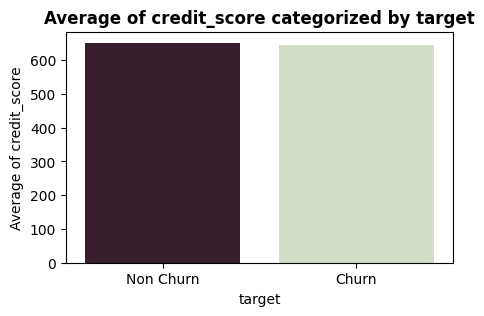

,target,credit_score
1,Non Churn,651.853196
0,Churn,645.351497


In [14]:
average(data,'target','credit_score')

**Observations**:
*   Credit_score of customer who has left is greater than customer who has not left.



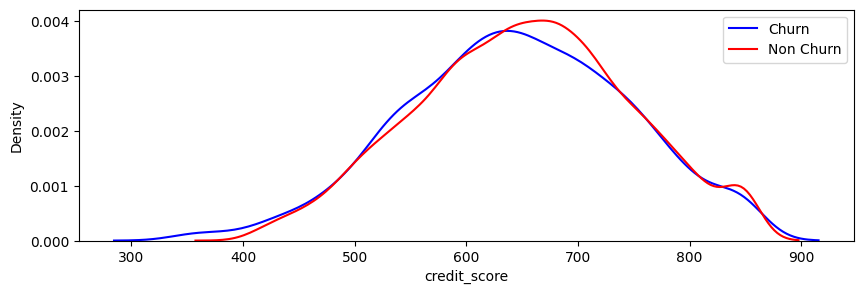

In [15]:
c_credit = data[data['churn']==1]['credit_score']
nc_credit = data[data['churn']==0]['credit_score']
plt.figure(figsize=(10,3))
sns.distplot(c_credit,hist=False,label="Churn", color='blue')
sns.distplot(nc_credit,hist=False,label="Non Churn", color='red')
plt.legend()
plt.show()

**Observation**:
* we can observe from above that the average credit_score for churn and non-churn customer is in the range of 600 to 750.

## country

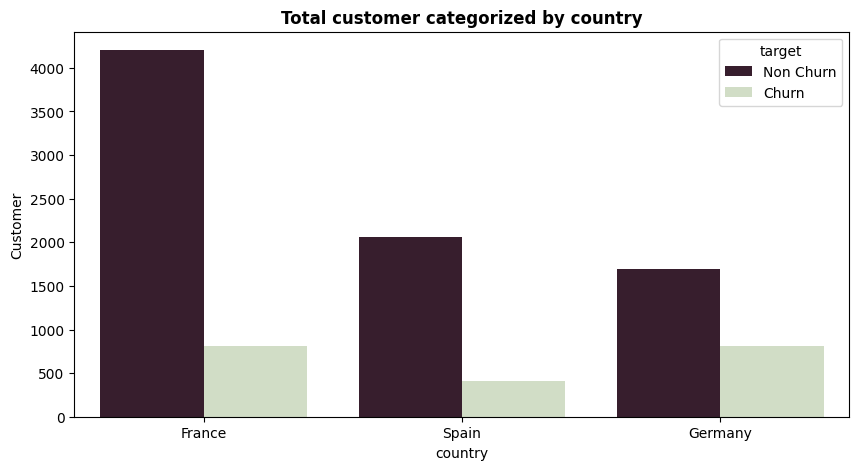

,country,target,customer_id
1,France,Non Churn,4204
5,Spain,Non Churn,2064
3,Germany,Non Churn,1695
2,Germany,Churn,814
0,France,Churn,810
4,Spain,Churn,413


In [16]:
uni_count(data,'country')

**Observations**:
* France has the highest number of non-churn customers
* Germany has the least number of non-churn customers, however it has the highest number of churn customers.


In [17]:
percentage(data,'country')

Detail of customer who has left bank categorized by country


,country,churn,percentage,total
1,Germany,814,32.443204,2509
2,Spain,413,16.673395,2477
0,France,810,16.154767,5014


**Observations**:
* 32,4% of customers from germany have left the bank.
* Germany is the country with the highest risk for churn customers.

## gender

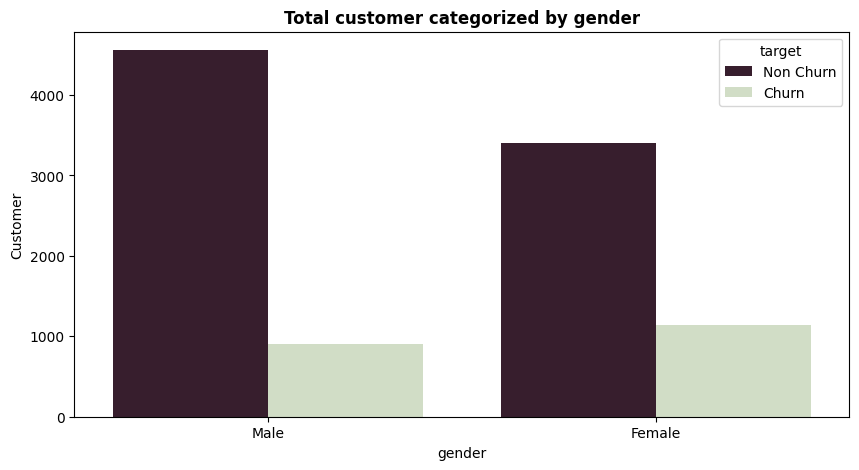

,gender,target,customer_id
3,Male,Non Churn,4559
1,Female,Non Churn,3404
0,Female,Churn,1139
2,Male,Churn,898


In [18]:
uni_count(data,'gender')

**Observations**:
* **Female** has tendency as **churn customer**.
* Male has the highest number for non-churn customer.

In [19]:
percentage(data,'gender')

Detail of customer who has left bank categorized by gender


,gender,churn,percentage,total
0,Female,1139,25.071539,4543
1,Male,898,16.455928,5457


**Observation**:
* 25% of female customers has left the bank.
* Female has a greater risk for churn-customer than male.

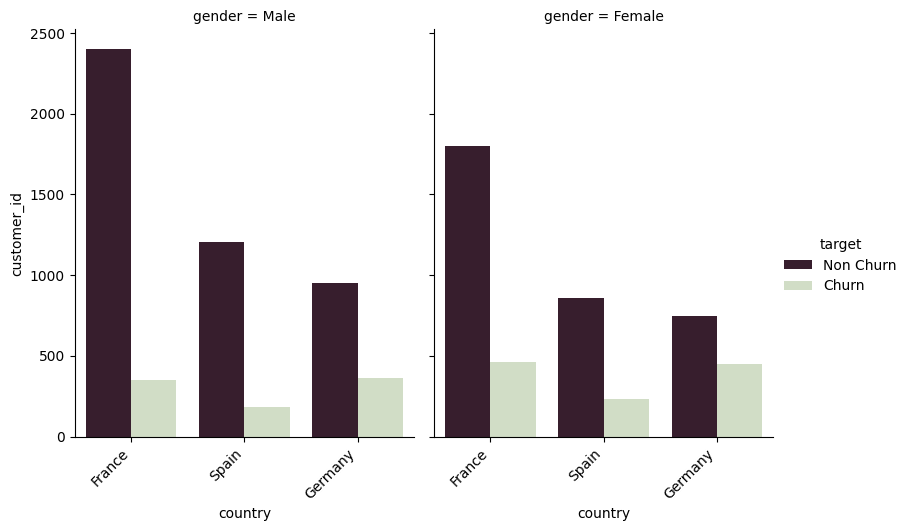

,country,gender,target,customer_id
3,France,Male,Non Churn,2403
1,France,Female,Non Churn,1801
11,Spain,Male,Non Churn,1206
7,Germany,Male,Non Churn,950
9,Spain,Female,Non Churn,858
5,Germany,Female,Non Churn,745
0,France,Female,Churn,460
4,Germany,Female,Churn,448
6,Germany,Male,Churn,366
2,France,Male,Churn,350


In [20]:
multi_count(data,'country','gender','target')

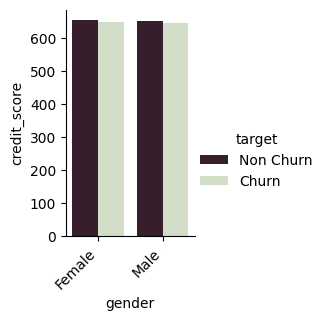

,gender,target,credit_score
1,Female,Non Churn,652.152468
3,Male,Non Churn,651.629743
0,Female,Churn,646.883231
2,Male,Churn,643.408686


In [21]:
multi_mean(data,'gender','credit_score')

**Observations**:
* Female has greater credit_score than male.

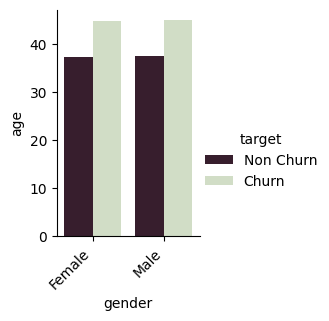

,gender,target,age
1,Female,Non Churn,37.382491
3,Male,Non Churn,37.427725
0,Female,Churn,44.784899
2,Male,Churn,44.905345


In [22]:
multi_mean(data,'gender','age')

**Observations**:
* Female has average age younger than male.

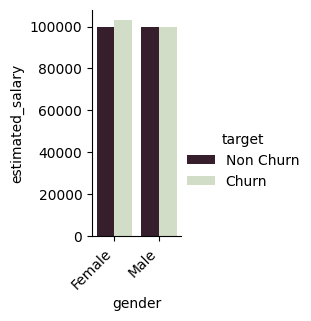

,gender,target,estimated_salary
1,Female,Non Churn,99816.071486
3,Male,Non Churn,99680.391827
0,Female,Churn,102948.986093
2,Male,Churn,99584.287272


In [23]:
multi_mean(data,'gender','estimated_salary')

**Observations**:
* Female has higher estimated_salary than male
* Female churn-customer has highest estimated_salary than non-churn customer.

## age

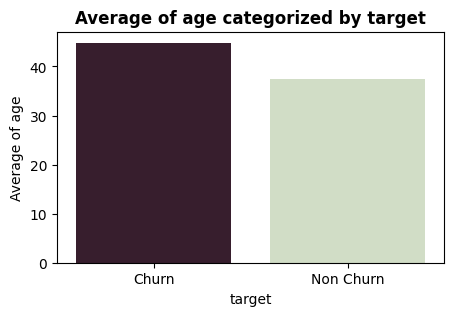

,target,age
0,Churn,44.837997
1,Non Churn,37.408389


In [24]:
average(data,'target','age')

**Observations**:
* Churn-customer has older age than non-churn customer

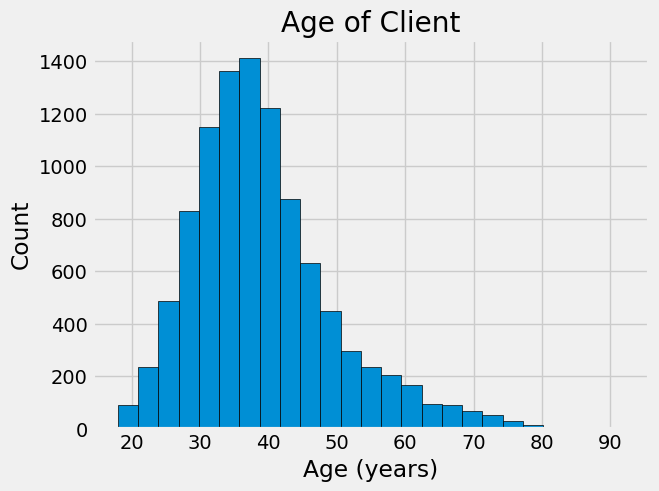

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(data['age'], edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count');

**Observations:**
* The average of age customers is in range 30 to 50.

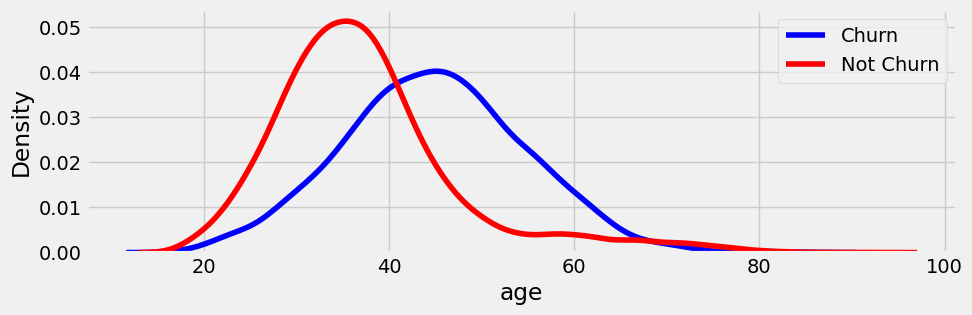

In [27]:
c_age = data[data['churn']==1]['age']
nc_age = data[data['churn']==0]['age']
plt.figure(figsize=(10,3))
sns.distplot(c_age,hist=False,label="Churn", color='blue')
sns.distplot(nc_age,hist=False,label="Non Churn", color='red')
plt.legend()
plt.show()

**Observations**:
* Customer non-churn has average of age younger than 50, meanwhile customer churn has average of age in range of 40 to 60.

In [28]:
# Age information into a separate dataframe
age_data = data[['churn', 'age']]
# Bin the age data
age_data['age_binned'] = pd.cut(age_data['age'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,churn,age,age_binned
0,1,42,"(40.0, 45.0]"
1,0,41,"(40.0, 45.0]"
2,1,42,"(40.0, 45.0]"
3,0,39,"(35.0, 40.0]"
4,0,43,"(40.0, 45.0]"
5,1,44,"(40.0, 45.0]"
6,0,50,"(45.0, 50.0]"
7,1,29,"(25.0, 30.0]"
8,0,44,"(40.0, 45.0]"
9,0,27,"(25.0, 30.0]"


In [29]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('age_binned').mean()
age_groups

,churn,age
age_binned,,
"(20.0, 25.0]",0.078544,23.478927
"(25.0, 30.0]",0.075166,28.289609
"(30.0, 35.0]",0.091076,33.077346
"(35.0, 40.0]",0.149603,37.954545
"(40.0, 45.0]",0.268027,42.770068
"(45.0, 50.0]",0.463529,47.750588
"(50.0, 55.0]",0.583514,52.800434
"(55.0, 60.0]",0.532738,57.913690
"(60.0, 65.0]",0.400000,62.575000


Text(0.5, 1.0, 'Leaving by Age Group')

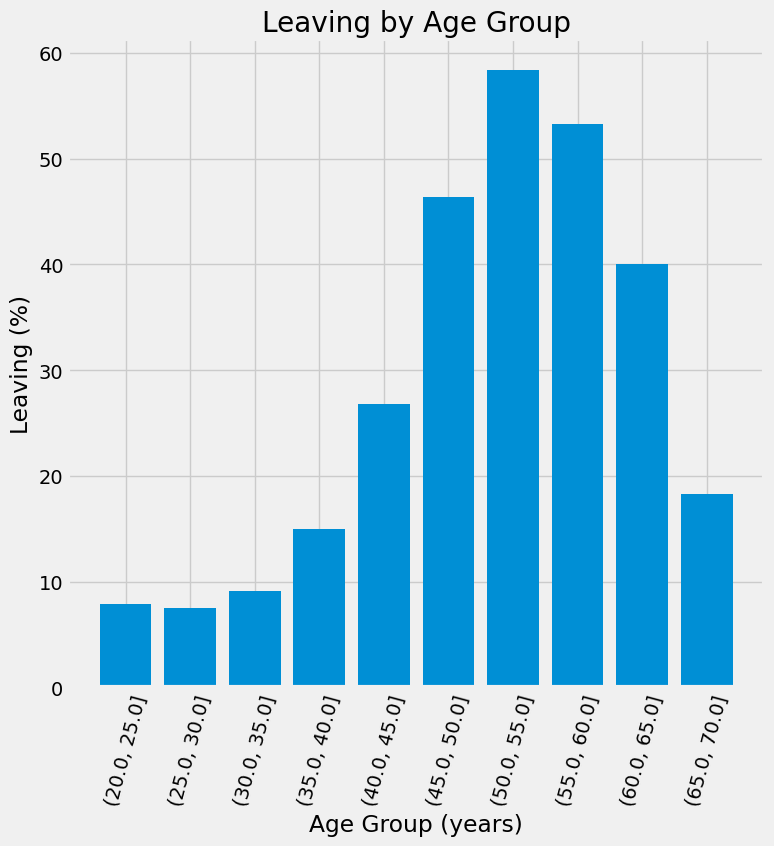

In [30]:
plt.figure(figsize = (8, 8))
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['churn'])
# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Leaving (%)')
plt.title('Leaving by Age Group')

**Observations**:
* Age between 50 to 55 is class with the highest number of customer-churn

## tenure

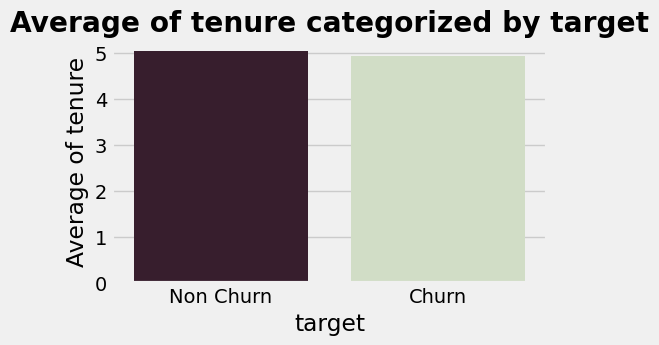

,target,tenure
1,Non Churn,5.033279
0,Churn,4.932744


In [31]:
average(data,'target','tenure')

**Observation**:
* The average tenure of churn and non-churn customer are almost same.

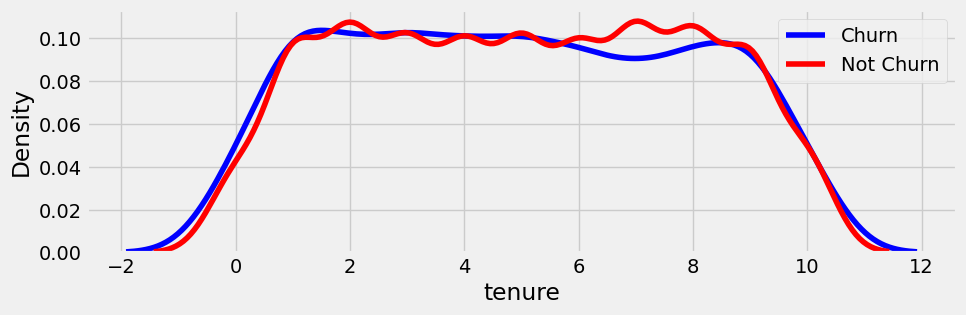

In [32]:
c_tenure = data[data['churn']==1]['tenure']
nc_tenure = data[data['churn']==0]['tenure']
plt.figure(figsize=(10,3))
sns.distplot(c_tenure,hist=False,label="Churn", color='blue')
sns.distplot(nc_tenure,hist=False,label="Not Churn", color='red')
plt.legend()
plt.show()

## balance

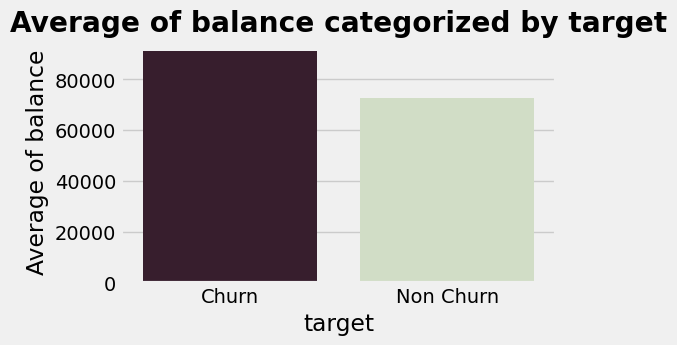

,target,balance
0,Churn,91108.539337
1,Non Churn,72745.296779


In [33]:
average(data,'target','balance')

**Observations**:
* The average balance of chrun customer is greater than non-chrun customer.

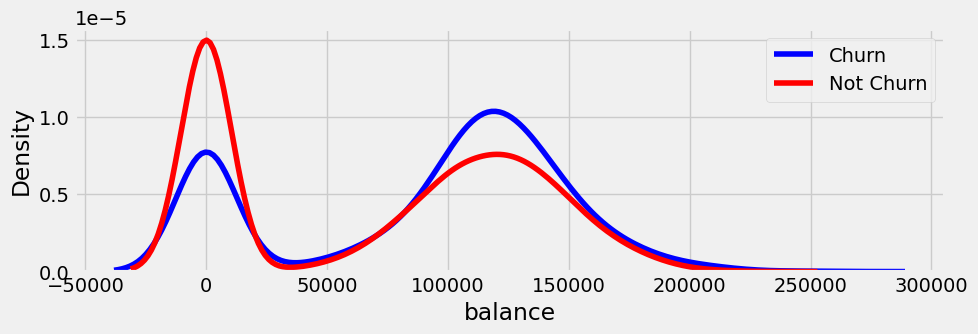

In [34]:
c_balance = data[data['churn']==1]['balance']
nc_balance = data[data['churn']==0]['balance']
plt.figure(figsize=(10,3))
sns.distplot(c_balance,hist=False,label="Churn", color='blue')
sns.distplot(nc_balance,hist=False,label="Not Churn", color='red')
plt.legend()
plt.show()

**Observations**:
* Many non-chrun customers have zero balance.


In [110]:
print(f"min balance {min(data['balance'].values)}")
print(f"max balance {max(data['balance'].values)}")

min balance 0.0
max balance 250898.09


## product_number

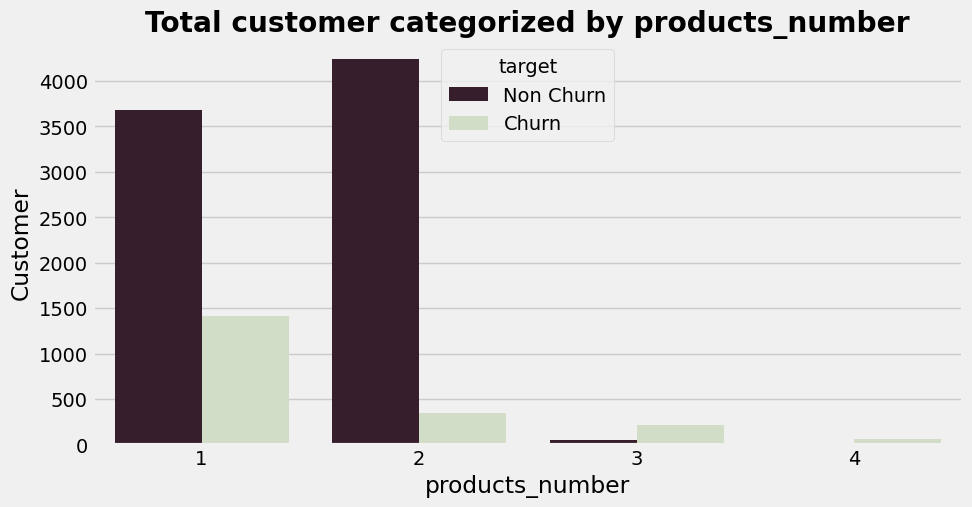

,products_number,target,customer_id
3,2,Non Churn,4242
1,1,Non Churn,3675
0,1,Churn,1409
2,2,Churn,348
4,3,Churn,220
6,4,Churn,60
5,3,Non Churn,46


In [36]:
uni_count(data,'products_number')

In [111]:
percentage(data,'products_number')

Detail of customer who has left bank categorized by products_number


,products_number,churn,percentage,total
3,4,60,100.000000,60
2,3,220,82.706767,266
0,1,1409,27.714398,5084
1,2,348,7.581699,4590


**Observations**:
* Most of customers take product number 1 and 2.
* Many churn customers take product number 1.
* All customers that take product number 4 are categorized as churn customer.

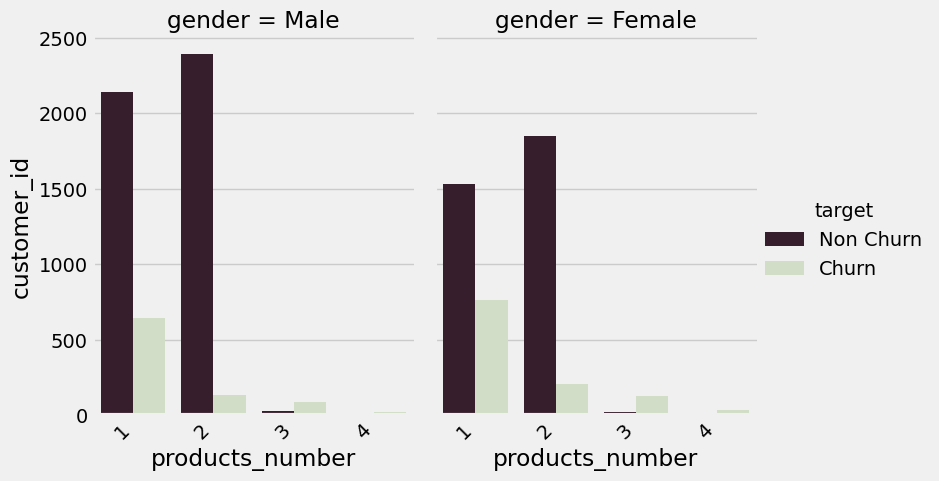

,products_number,gender,target,customer_id
7,2,Male,Non Churn,2392
3,1,Male,Non Churn,2141
5,2,Female,Non Churn,1850
1,1,Female,Non Churn,1534
0,1,Female,Churn,762
2,1,Male,Churn,647
4,2,Female,Churn,210
6,2,Male,Churn,138
8,3,Female,Churn,129
10,3,Male,Churn,91


In [112]:
multi_count(data,'products_number','gender','target')

## credit_card

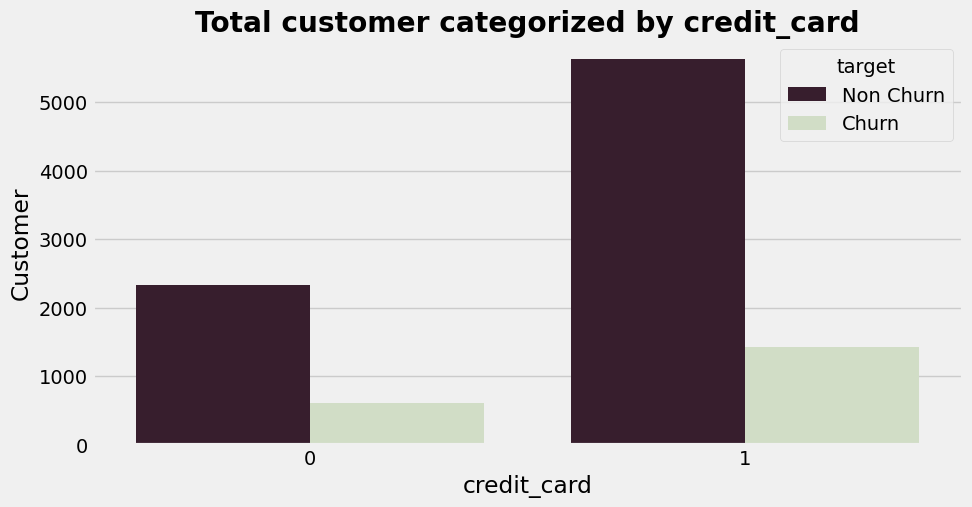

,credit_card,target,customer_id
3,1,Non Churn,5631
1,0,Non Churn,2332
2,1,Churn,1424
0,0,Churn,613


In [39]:
uni_count(data,'credit_card')

In [40]:
percentage(data,'credit_card')

Detail of customer who has left bank categorized by credit_card


,credit_card,churn,percentage,total
0,0,613,20.814941,2945
1,1,1424,20.184266,7055


**Observations**:
* 20% from churn customer take a credit card.

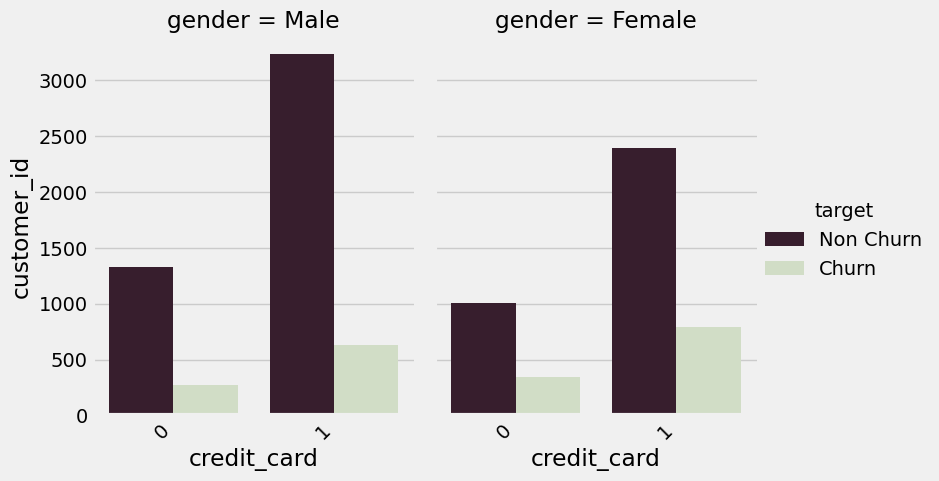

,credit_card,gender,target,customer_id
7,1,Male,Non Churn,3234
5,1,Female,Non Churn,2397
3,0,Male,Non Churn,1325
1,0,Female,Non Churn,1007
4,1,Female,Churn,795
6,1,Male,Churn,629
0,0,Female,Churn,344
2,0,Male,Churn,269


In [41]:
multi_count(data,'credit_card','gender','target')

## active_member

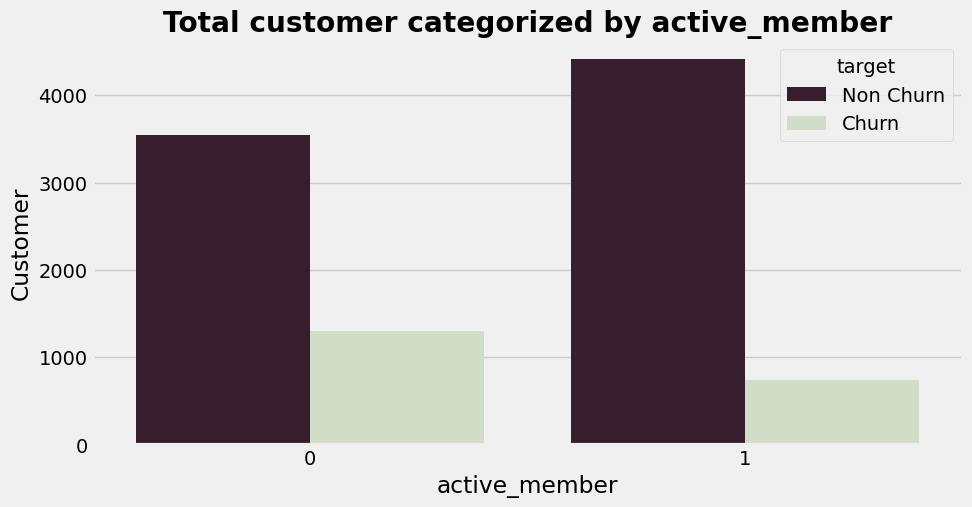

,active_member,target,customer_id
3,1,Non Churn,4416
1,0,Non Churn,3547
0,0,Churn,1302
2,1,Churn,735


In [42]:
uni_count(data,'active_member')

In [43]:
percentage(data,'active_member')

Detail of customer who has left bank categorized by active_member


,active_member,churn,percentage,total
0,0,1302,26.850897,4849
1,1,735,14.269074,5151


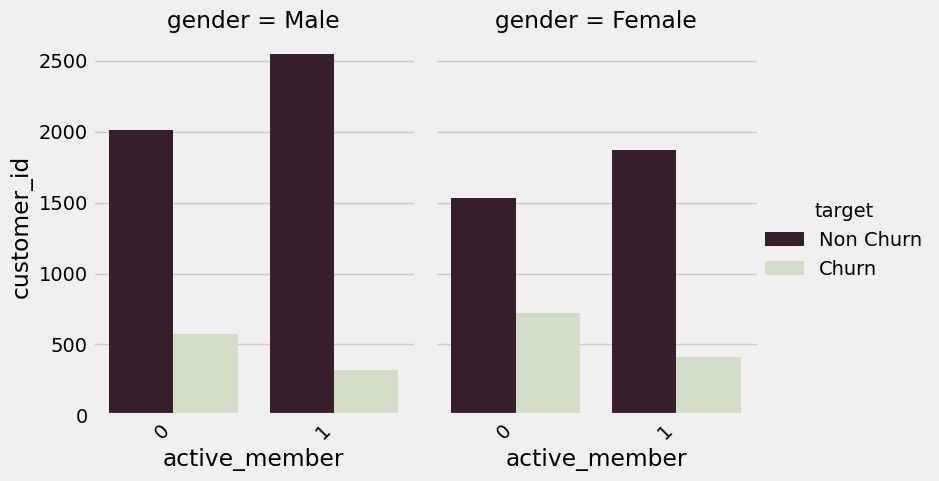

,active_member,gender,target,customer_id
7,1,Male,Non Churn,2546
3,0,Male,Non Churn,2013
5,1,Female,Non Churn,1870
1,0,Female,Non Churn,1534
0,0,Female,Churn,725
2,0,Male,Churn,577
4,1,Female,Churn,414
6,1,Male,Churn,321


In [44]:
multi_count(data,'active_member','gender','target')

## estimated_salary

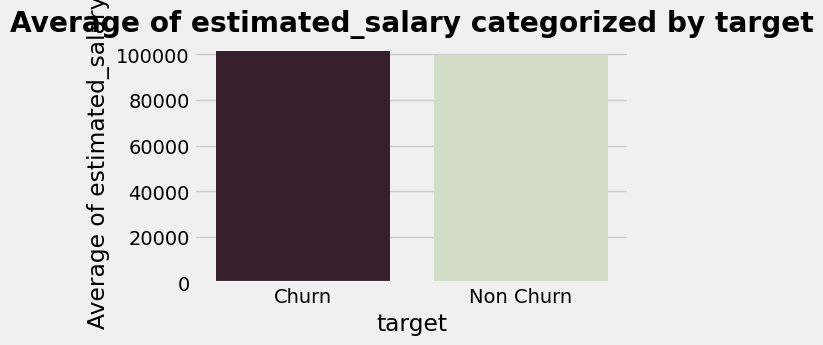

,target,estimated_salary
0,Churn,101465.677531
1,Non Churn,99738.391772


In [45]:
average(data,'target','estimated_salary')

**Observations**:
* churn customer has the average of salary greater than non churn customer.

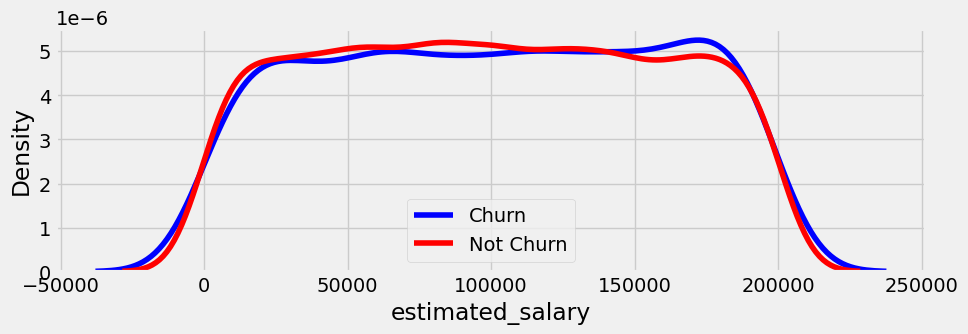

In [46]:
c_salary = data[data['churn']==1]['estimated_salary']
nc_salary = data[data['churn']==0]['estimated_salary']
plt.figure(figsize=(10,3))
sns.distplot(c_salary,hist=False,label="Churn", color='blue')
sns.distplot(nc_salary,hist=False,label="Not Churn", color='red')
plt.legend()
plt.show()

In [47]:
print(f"min salary {min(data['estimated_salary'].values)}")
print(f"max salary {max(data['estimated_salary'].values)}")

min salary 11.58
max salary 199992.48


# Data Cleaning and Preparation

In [48]:
train = df.copy()

In [49]:
train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
train.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [51]:
train.duplicated().sum()

0

In [52]:
# function for one encoding
def one_hot_encode(df):
  original_columns = list(df.columns)
  categories = [cat for cat in df.columns if df[cat].dtype == 'object']
  df = pd.get_dummies(df,columns= categories, dummy_na= True) #one_hot_encode the categorical features
  categorical_columns = [cat for cat in df.columns if cat not in original_columns]
  return df, categorical_columns

## Preparing Model

In [53]:
# Find correlations with the target and sort
correlations = train.corr()['churn'].sort_values(ascending=False)

# Display correlations
print(correlations)
print('\n')
print('Most Positive Correlations:\n',correlations.head(4))
print('\nMost Negative Correlations:\n',correlations.tail(6))

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


Most Positive Correlations:
 churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
Name: churn, dtype: float64

Most Negative Correlations:
 customer_id       -0.006248
credit_card       -0.007138
tenure            -0.014001
credit_score      -0.027094
products_number   -0.047820
active_member     -0.156128
Name: churn, dtype: float64


**Observations**:
* age has the strongest positive correlation with target
* meanwhile, active_member has the strongest negative correlation with target.

## Future Selection

In [54]:
train_ml = train.copy()
train_ml.drop(['customer_id'], inplace=True, axis=1)
train_ml.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
train_ml.dtypes.value_counts()

int64      7
object     2
float64    2
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_object = {}
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
      le.fit(train_ml[col])
      train_ml[col] = le.fit_transform(train_ml[col])
      label_object[col] = le

# Keep track of how many columns were label encoded
      le_count += 1

print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [57]:
train_ml.dtypes.value_counts()

int64      9
float64    2
dtype: int64

In [58]:
train_ml.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [59]:
x = train_ml.drop(['churn'], axis=1)
y = train_ml['churn']

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
bestscore = featureScores.sort_values(by=['Score'], ascending=False)
bestscore

The features that correlate well with target feature:



,Features,Score
5,balance,7.151303e+06
9,estimated_salary,4.835088e+04
3,age,2.300417e+03
8,active_member,1.181994e+02
0,credit_score,1.054035e+02
2,gender,5.153993e+01
1,country,1.185325e+01
6,products_number,5.055394e+00
4,tenure,3.270538e+00
7,credit_card,1.500410e-01


## Handling Data Imbalance

In [61]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class
df_majority = train_ml[(train_ml['churn']==0)]
df_minority = train_ml[(train_ml['churn']==1)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 7963, # to match majority class
                                 random_state=65)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

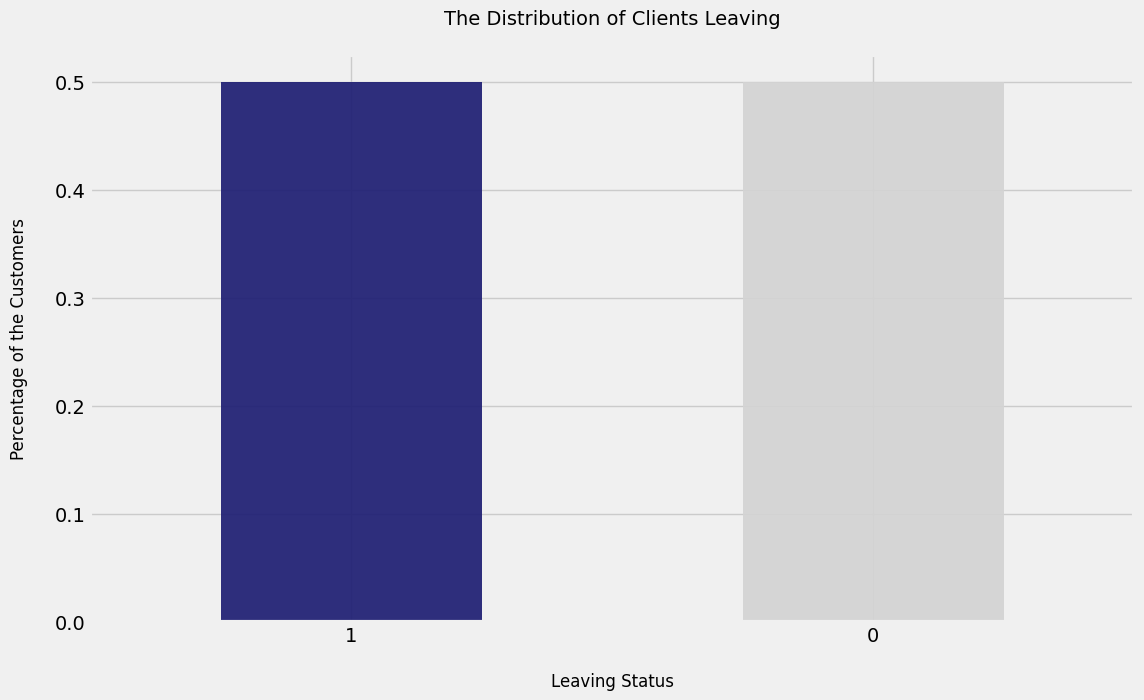

In [62]:
fig = plt.figure(figsize = (12,7))
df_upsampled['churn'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Leaving\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nLeaving Status', fontsize=12)
plt.show()

## Data Splitting

In [63]:
bestscore.head(10)['Features'].values

array(['balance', 'estimated_salary', 'age', 'active_member',
       'credit_score', 'gender', 'country', 'products_number', 'tenure',
       'credit_card'], dtype=object)

In [64]:
x_balanced = df_upsampled[['balance', 'estimated_salary', 'age', 'active_member',
       'credit_score', 'gender', 'country', 'products_number', 'tenure',
       'credit_card']]
y_balanced = df_upsampled['churn']

In [65]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(12740, 10) (3186, 10)


# Model Building

## Logistic Regression

In [66]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [67]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      6382
           1       0.66      0.66      0.66      6358

    accuracy                           0.66     12740
   macro avg       0.66      0.66      0.66     12740
weighted avg       0.66      0.66      0.66     12740



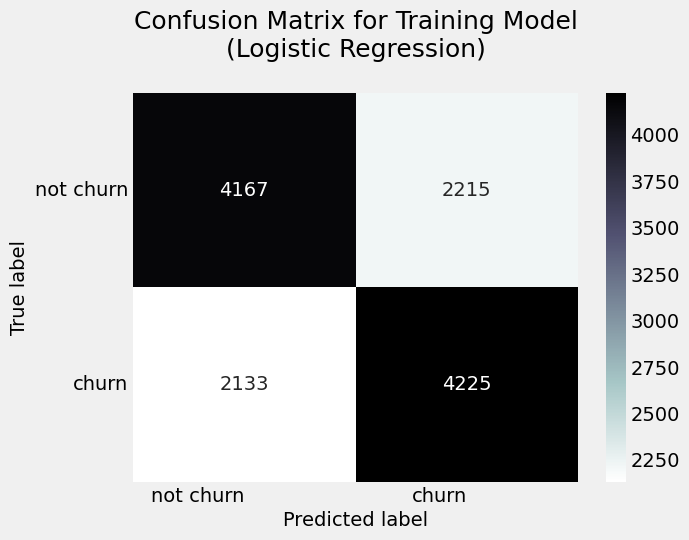

In [68]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [69]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1581
           1       0.67      0.68      0.67      1605

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.67      0.67      0.67      3186



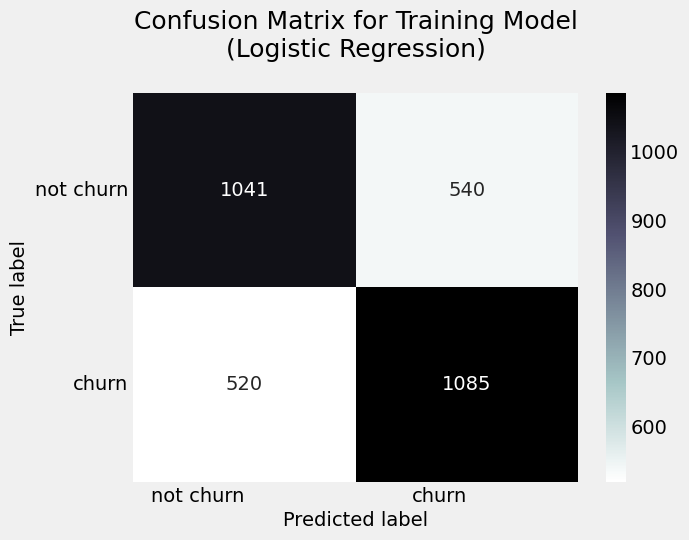

In [70]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [71]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_log_train), '%')
print('Test Accuracy: %s' % format(acc_log_test), '%')

Training Accuracy: 65.87 %
Test Accuracy: 66.73 %


In [72]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6672


In [73]:
ml_result = pd.DataFrame(
   {
    "Models": [],
    "Training Accuracy Score": [],
    "Testing Accuracy Score": [],
    "ROC Score" : []
   }
)

In [74]:
acc_log_tr = log_model.score(X_train,y_train)
acc_log_ts = log_model.score(X_test,y_test)

ml_result.loc[0] = ["Logistic Regression" , acc_log_tr, acc_log_ts, roc_auc_log]
ml_result.loc[0]

Models                     Logistic Regression
Training Accuracy Score               0.658713
Testing Accuracy Score                0.667294
ROC Score                               0.6672
Name: 0, dtype: object

## Gaussian Naive Bayes

In [75]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [76]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      6382
           1       0.71      0.65      0.68      6358

    accuracy                           0.69     12740
   macro avg       0.69      0.69      0.69     12740
weighted avg       0.69      0.69      0.69     12740



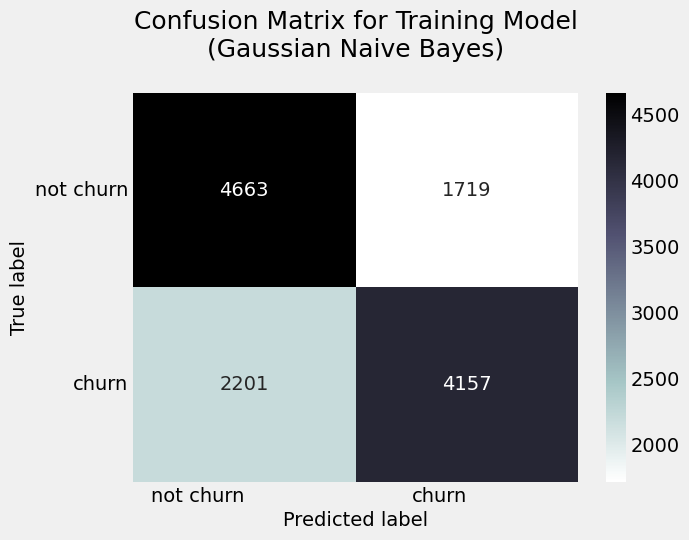

In [77]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [78]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1581
           1       0.73      0.67      0.70      1605

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



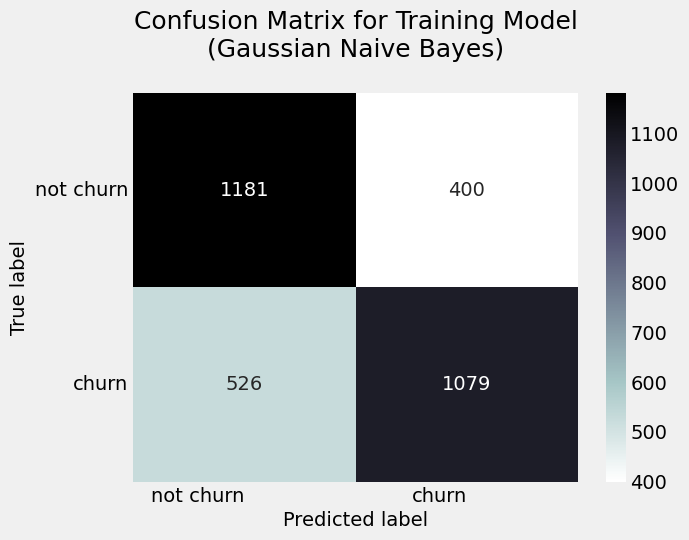

In [79]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [80]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_gnb_train), '%')
print('Test Accuracy: %s' % format(acc_gnb_test), '%')

Training Accuracy: 69.23 %
Test Accuracy: 70.94 %


In [81]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.7096


In [82]:
acc_gnb_tr = gnb_model.score(X_train,y_train)
acc_gnb_ts = gnb_model.score(X_test,y_test)

ml_result.loc[1] = ["Gaussian Naive Bayes" , acc_gnb_tr, acc_gnb_ts, roc_auc_gnb]
ml_result.loc[1]

Models                     Gaussian Naive Bayes
Training Accuracy Score                0.692308
Testing Accuracy Score                 0.709353
ROC Score                                0.7096
Name: 1, dtype: object

## Decision Tree

In [83]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [84]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Desicion Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Desicion Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6382
           1       1.00      1.00      1.00      6358

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



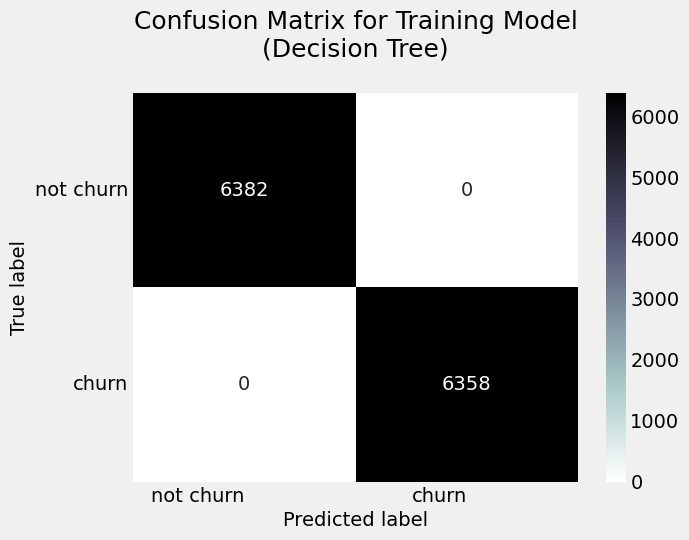

In [85]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [86]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Desicion Tree):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Desicion Tree):
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1581
           1       0.88      0.98      0.93      1605

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



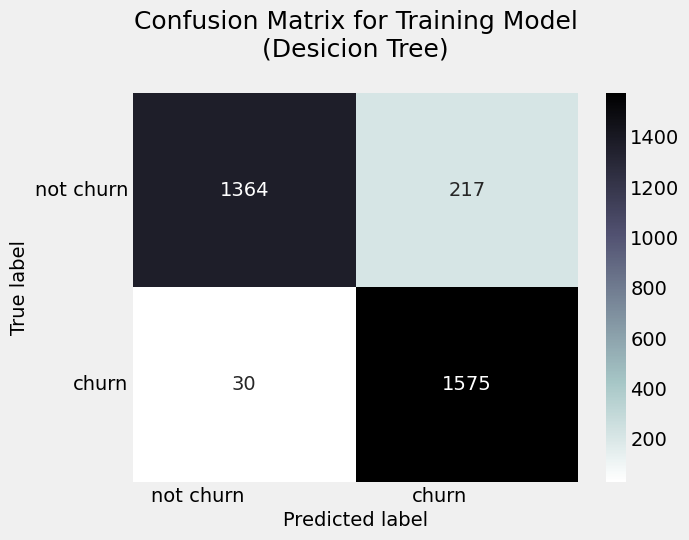

In [87]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Desicion Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [88]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_dt_train), '%')
print('Test Accuracy: %s' % format(acc_dt_test), '%')

Training Accuracy: 100.0 %
Test Accuracy: 92.25 %


In [89]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.922


In [90]:
acc_dt_tr = dt_model.score(X_train,y_train)
acc_dt_ts = dt_model.score(X_test,y_test)

ml_result.loc[2] = ["Desicion Tree" , acc_dt_tr, acc_dt_ts, roc_auc_dt]
ml_result.loc[2]

Models                     Desicion Tree
Training Accuracy Score              1.0
Testing Accuracy Score          0.922473
ROC Score                          0.922
Name: 2, dtype: object

## Random Forest

In [91]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [92]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6382
           1       1.00      1.00      1.00      6358

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



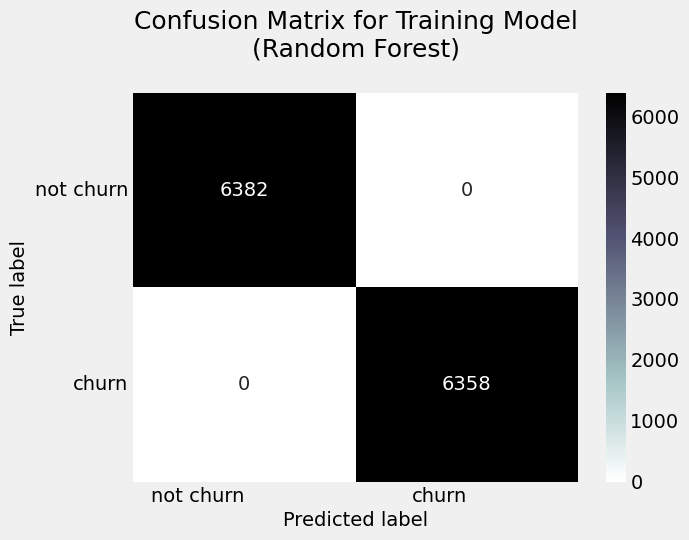

In [93]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [94]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1581
           1       0.93      0.98      0.96      1605

    accuracy                           0.95      3186
   macro avg       0.96      0.95      0.95      3186
weighted avg       0.96      0.95      0.95      3186



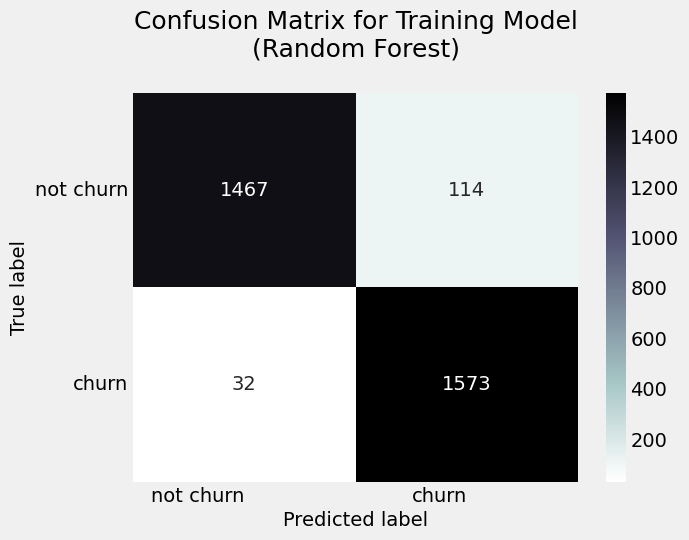

In [95]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('not churn', 'churn'), ('not churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [96]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_rf_train), '%')
print('Test Accuracy: %s' % format(acc_rf_test), '%')

Training Accuracy: 100.0 %
Test Accuracy: 95.42 %


In [97]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.954


In [98]:
acc_rf_tr = rf_model.score(X_train,y_train)
acc_rf_ts = rf_model.score(X_test,y_test)

ml_result.loc[3] = ["Random Forest" , acc_rf_tr, acc_rf_ts, roc_auc_rf]
ml_result.loc[3]

Models                     Random Forest
Training Accuracy Score              1.0
Testing Accuracy Score          0.954175
ROC Score                          0.954
Name: 3, dtype: object

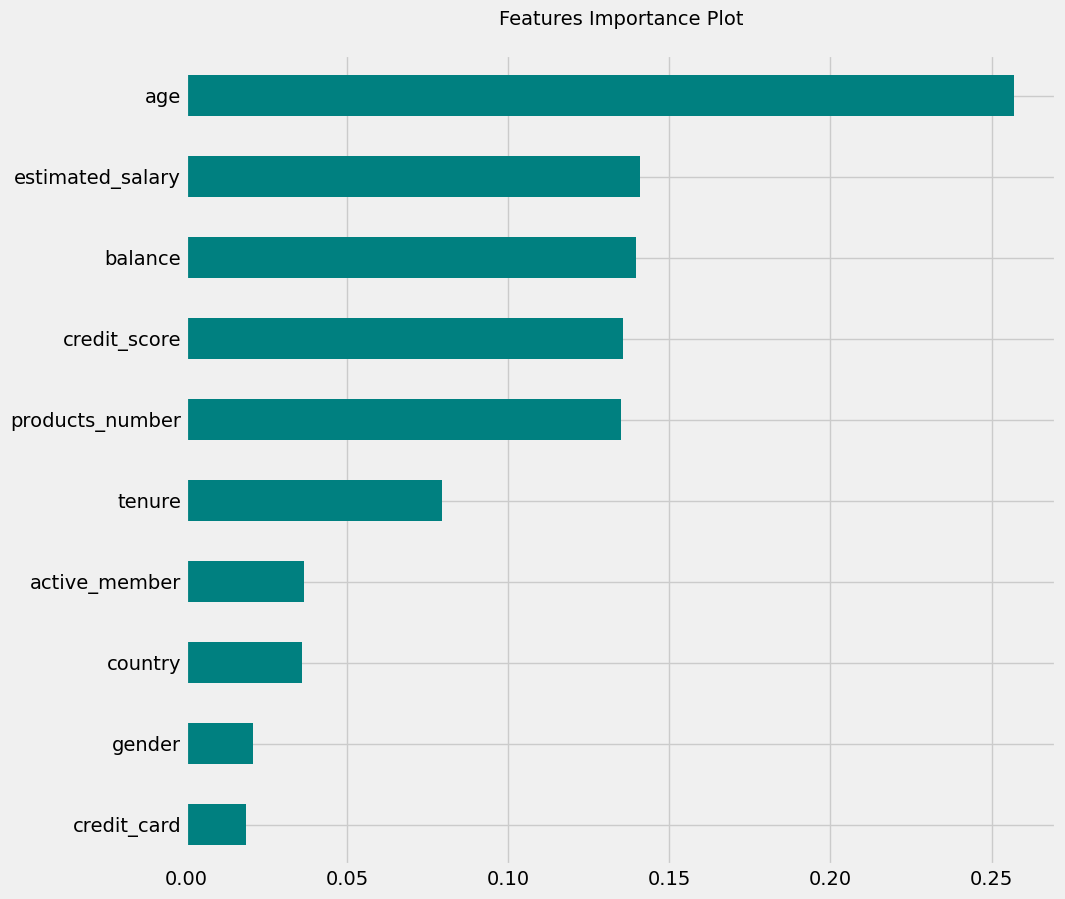

In [99]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

#plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

## Neural Network

In [100]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

In [101]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6382
           1       0.58      0.00      0.01      6358

    accuracy                           0.50     12740
   macro avg       0.54      0.50      0.34     12740
weighted avg       0.54      0.50      0.34     12740



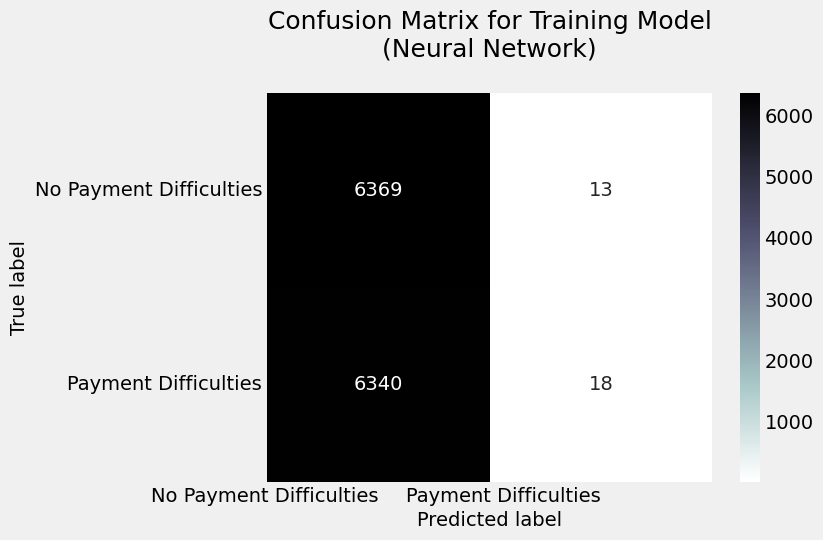

In [102]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [103]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1581
           1       0.50      0.00      0.01      1605

    accuracy                           0.50      3186
   macro avg       0.50      0.50      0.33      3186
weighted avg       0.50      0.50      0.33      3186



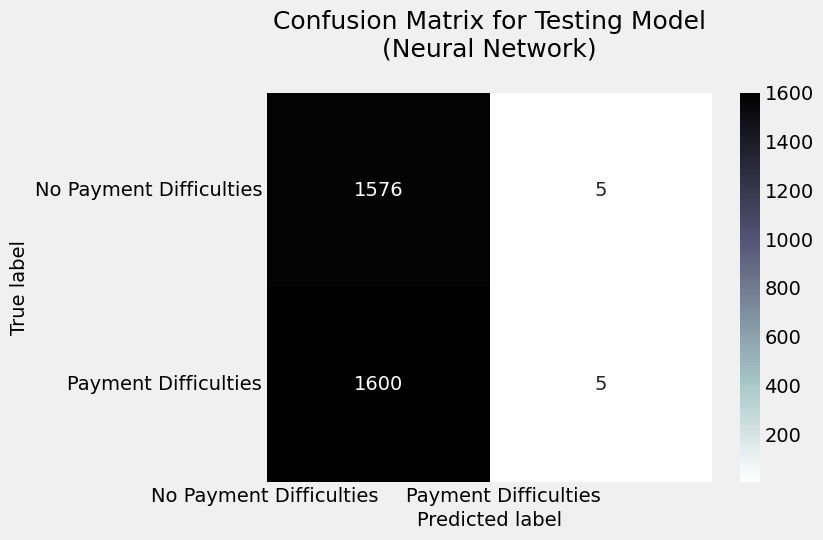

In [104]:
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [105]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_nn_train), '%')
print('Test Accuracy: %s' % format(acc_nn_test), '%')

Training Accuracy: 50.13 %
Test Accuracy: 49.62 %


In [106]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.5


In [107]:
nn_tr = nn_model.score(X_train,y_train)
nn_ts = nn_model.score(X_test,y_test)

ml_result.loc[4] = ["Neural Network" , nn_tr, nn_ts, roc_auc_nn]

In [108]:
ml_result

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
0,Logistic Regression,0.658713,0.667294,0.6672
1,Gaussian Naive Bayes,0.692308,0.709353,0.7096
2,Desicion Tree,1.000000,0.922473,0.9220
3,Random Forest,1.000000,0.954175,0.9540
4,Neural Network,0.501334,0.496234,0.5000


In [109]:
ml_result.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.954175,0.9540
2,Desicion Tree,1.000000,0.922473,0.9220
1,Gaussian Naive Bayes,0.692308,0.709353,0.7096
0,Logistic Regression,0.658713,0.667294,0.6672
4,Neural Network,0.501334,0.496234,0.5000


**Best model** for this prediction is using D**esicion Tree and Random Forest** Classifier. Best Features used in model are 'balance', 'estimated_salary', 'age', 'active_member', 'credit_score', 'gender', 'country', 'products_number', 'tenure', 'credit_card'.